
|Notebook                                    |Description|
|:-                                          |:-         |
|airline-customer-satisfaction-prediction-eda|EDA        |
|airline-customer-satisfaction-logistic      |Logistic Regression Models|
|airline-customer-satisfaction-decision-tree |Decision Tree Models|
|airline-customer-satisfaction-naive-bayes |Native Bayes Models|
|airline-customer-satisfaction-random-forest |Random Forest Models|
|airline-customer-satisfaction-xgboost       |XGBoost Models|


In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 200)

In [3]:
#load decision tree results
dt_potential_good_models=pd.read_csv('/kaggle/input/airline-customer-satisfaction-decision-tree/dt_potential_good_models.csv')

#load logistic regression results
lgr_potential_good_models=pd.read_csv('/kaggle/input/airline-customer-satisfaction-logistic/lgr_potential_good_models.csv')

#load random forest results
rf_potential_good_models=pd.read_csv('/kaggle/input/airline-customer-satisfaction-random-forest/rf_potential_good_models.csv')

#load XGBoost results
xgb_potential_good_models=pd.read_csv('/kaggle/input/airline-customer-satisfaction-xgboost/xgb_potential_good_models.csv')

#load Bayes results
nb_potential_good_models=pd.read_csv('/kaggle/input/airline-customer-satisfaction-naive-bayes/nb_potential_good_models.csv')


df_potential_good_models=pd.concat([dt_potential_good_models,
                                    lgr_potential_good_models,
                                    rf_potential_good_models,
                                    xgb_potential_good_models,
                                    nb_potential_good_models]).reset_index(drop=True)

df_potential_good_models.head(10)

,type,features,feature_index,model,dataset,precision,recall,F1,accuracy,ROC_AUC
0,Decision Tree,customer_type+age+type_of_travel+class+flight_distance+rating items+departure_delay_in_minutes,2,dt_mix1_df3_cv2_hyp2_gs1,train,0.963393,0.953296,0.958318,0.954612,0.993769
1,Decision Tree,customer_type+age+type_of_travel+class+flight_distance+rating items+departure_delay_in_minutes,2,dt_mix1_df3_cv2_hyp2_gs1,validation,0.946849,0.943918,0.945381,0.940304,0.981292
2,Decision Tree,age+type_of_travel+class+flight_distance+rating items+departure_delay_in_minutes,3,dt_mix1_df3_cv3_hyp2_gs1,train,0.961033,0.928632,0.944554,0.940330,0.988401
3,Decision Tree,age+type_of_travel+class+flight_distance+rating items+departure_delay_in_minutes,3,dt_mix1_df3_cv3_hyp2_gs1,validation,0.948723,0.923099,0.935735,0.930603,0.980114
4,Decision Tree,customer_type+age+class+flight_distance+rating items+departure_delay_in_minutes,4,dt_mix1_df3_cv4_hyp2_gs1,train,0.958247,0.941644,0.949873,0.945604,0.990025
5,Decision Tree,customer_type+age+class+flight_distance+rating items+departure_delay_in_minutes,4,dt_mix1_df3_cv4_hyp2_gs1,validation,0.946823,0.933415,0.940071,0.934863,0.982081
6,Decision Tree,customer_type+age+type_of_travel+class+flight_distance+departure_delay_in_minutes,50,dt_mix1_df3_cv50_hyp2_gs1,train,0.738077,0.739098,0.738587,0.713646,0.787495
7,Decision Tree,customer_type+age+type_of_travel+class+flight_distance+departure_delay_in_minutes,50,dt_mix1_df3_cv50_hyp2_gs1,validation,0.741959,0.748570,0.745250,0.719895,0.791166
8,Decision Tree,age+class+flight_distance+rating items+departure_delay_in_minutes,6,dt_mix1_df3_cv6_hyp2_gs1,train,0.960704,0.938315,0.949377,0.945231,0.990875
9,Decision Tree,age+class+flight_distance+rating items+departure_delay_in_minutes,6,dt_mix1_df3_cv6_hyp2_gs1,validation,0.947010,0.926850,0.936822,0.931578,0.975869


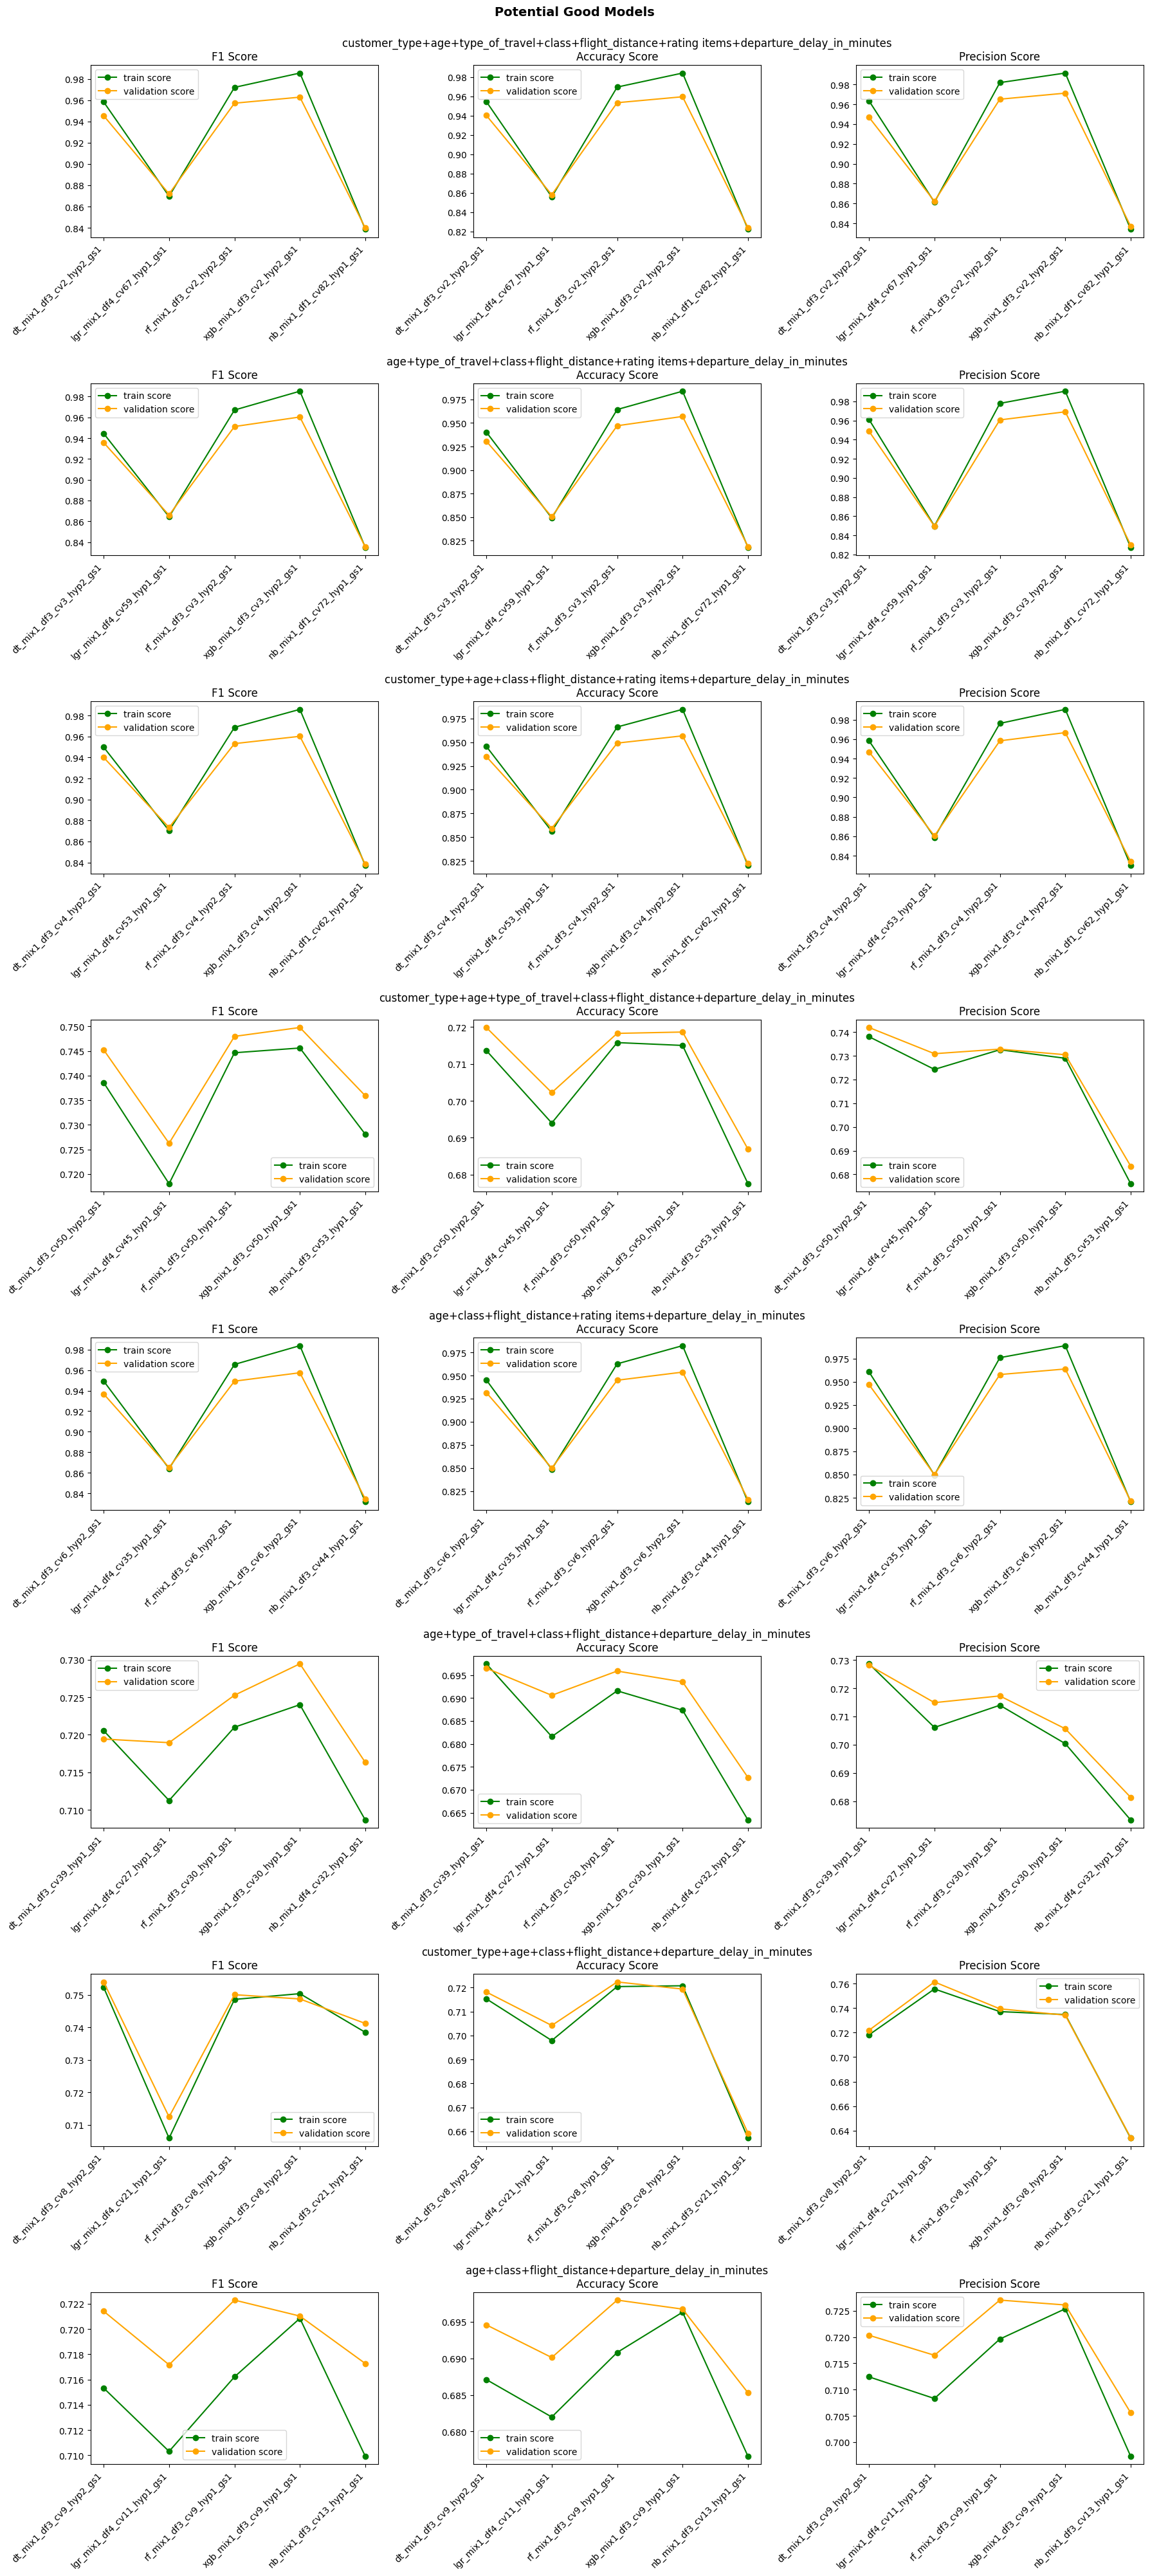

In [4]:
##############################################
#Show Trian and Validation Results
##############################################

metrics=['precision','recall', 'F1','accuracy','ROC_AUC']
features_list=[
    "customer_type+age+type_of_travel+class+flight_distance+rating items+departure_delay_in_minutes",
    "age+type_of_travel+class+flight_distance+rating items+departure_delay_in_minutes",
    "customer_type+age+class+flight_distance+rating items+departure_delay_in_minutes",
    "customer_type+age+type_of_travel+class+flight_distance+departure_delay_in_minutes",
    "age+class+flight_distance+rating items+departure_delay_in_minutes",
    "age+type_of_travel+class+flight_distance+departure_delay_in_minutes",
    "customer_type+age+class+flight_distance+departure_delay_in_minutes",
    "age+class+flight_distance+departure_delay_in_minutes",
]
rowCnt=len(features_list)
colCnt=3
fig, axs = plt.subplots(rowCnt, colCnt, figsize=(colCnt*6,rowCnt*5))
for features, row_index in zip(features_list, range(rowCnt)):
    mask_train=(df_potential_good_models['features']==features)&(df_potential_good_models['dataset']=='train')
    mask_val=(df_potential_good_models['features']==features)&(df_potential_good_models['dataset']=='validation')

    #*********************************#
    #F1 Score
    #*********************************#
    ax=axs[row_index][0]
    #plot train scores
    ax.plot(df_potential_good_models[mask_train]['model'], df_potential_good_models[mask_train]['F1'], color='green', label='train score',marker='o')
    #plot validation scores
    ax.plot(df_potential_good_models[mask_val]['model'], df_potential_good_models[mask_val]['F1'], color='orange', label='validation score',marker='o')
    #ax.set_title(features)
    ax.set_title('F1 Score')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.legend()
    #*********************************#
    #Accuracy Score
    #*********************************#
    ax=axs[row_index][1]
    #plot train scores
    ax.plot(df_potential_good_models[mask_train]['model'], df_potential_good_models[mask_train]['accuracy'], color='green', label='train score',marker='o')
    #plot validation scores
    ax.plot(df_potential_good_models[mask_val]['model'], df_potential_good_models[mask_val]['accuracy'], color='orange', label='validation score',marker='o')
    ax.set_title(features+'\nAccuracy Score')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.legend()
    #*********************************#
    #Precision Score
    #*********************************#
    ax=axs[row_index][2]
    #plot train scores
    ax.plot(df_potential_good_models[mask_train]['model'], df_potential_good_models[mask_train]['precision'], color='green', label='train score',marker='o')
    #plot validation scores
    ax.plot(df_potential_good_models[mask_val]['model'], df_potential_good_models[mask_val]['precision'], color='orange', label='validation score',marker='o')
    ax.set_title('Precision Score')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.legend()

plt.suptitle('Potential Good Models',y=1,fontsize=14,fontweight='bold')
plt.tight_layout()
plt.show()

Select a champion model

|Model Features Used|Potential Champion Model|
|:-|:-|
|customer_type+age+type_of_travel+class+flight_distance+rating items+departure_delay_in_minutes|xgb_mix1_df3_cv2_hyp2_gs1|
|age+type_of_travel+class+flight_distance+rating items+departure_delay_in_minutes|xgb_mix1_df3_cv3_hyp2_gs1|
|customer_type+age+class+flight_distance+rating items+departure_delay_in_minutes|xgb_mix1_df3_cv4_hyp2_gs1|
|customer_type+age+type_of_travel+class+flight_distance+departure_delay_in_minutes|xgb_mix1_df3_cv50_hyp1_gs1|
|age+class+flight_distance+rating items+departure_delay_in_minutes|xgb_mix1_df3_cv6_hyp2_gs1|
|age+type_of_travel+class+flight_distance+departure_delay_in_minutes|rf_mix1_df3_cv30_hyp1_gs1|
|customer_type+age+class+flight_distance+departure_delay_in_minutes|rf_mix1_df3_cv8_hyp1_gs1|
|age+class+flight_distance+departure_delay_in_minutes|rf_mix1_df3_cv9_hyp1_gs1|





In [5]:
potential_champion_models=['xgb_mix1_df3_cv2_hyp2_gs1','xgb_mix1_df3_cv3_hyp2_gs1',
                 'xgb_mix1_df3_cv4_hyp2_gs1','xgb_mix1_df3_cv50_hyp1_gs1',
                 'xgb_mix1_df3_cv6_hyp2_gs1','rf_mix1_df3_cv30_hyp1_gs1',
                 'rf_mix1_df3_cv8_hyp1_gs1','rf_mix1_df3_cv9_hyp1_gs1']

potential_champion_model_score=df_potential_good_models[df_potential_good_models['model'].isin(potential_champion_models)]

potential_champion_model_score['features'] = pd.Categorical(potential_champion_model_score['features'], categories=features_list, ordered=True)
potential_champion_model_score=potential_champion_model_score.sort_values('features')

potential_champion_model_score

,type,features,feature_index,model,dataset,precision,recall,F1,accuracy,ROC_AUC
48,XGBoost,customer_type+age+type_of_travel+class+flight_distance+rating items+departure_delay_in_minutes,2,xgb_mix1_df3_cv2_hyp2_gs1,train,0.991433,0.979509,0.985435,0.984152,0.998909
49,XGBoost,customer_type+age+type_of_travel+class+flight_distance+rating items+departure_delay_in_minutes,2,xgb_mix1_df3_cv2_hyp2_gs1,validation,0.971183,0.954516,0.962777,0.959604,0.993961
50,XGBoost,age+type_of_travel+class+flight_distance+rating items+departure_delay_in_minutes,3,xgb_mix1_df3_cv3_hyp2_gs1,train,0.990590,0.979813,0.985172,0.983857,0.998949
51,XGBoost,age+type_of_travel+class+flight_distance+rating items+departure_delay_in_minutes,3,xgb_mix1_df3_cv3_hyp2_gs1,validation,0.969063,0.951796,0.960352,0.956986,0.993306
52,XGBoost,customer_type+age+class+flight_distance+rating items+departure_delay_in_minutes,4,xgb_mix1_df3_cv4_hyp2_gs1,train,0.990557,0.981267,0.985890,0.984627,0.999026
53,XGBoost,customer_type+age+class+flight_distance+rating items+departure_delay_in_minutes,4,xgb_mix1_df3_cv4_hyp2_gs1,validation,0.966641,0.953859,0.960208,0.956729,0.993318
54,XGBoost,customer_type+age+type_of_travel+class+flight_distance+departure_delay_in_minutes,50,xgb_mix1_df3_cv50_hyp1_gs1,train,0.728973,0.763036,0.745616,0.715032,0.788887
55,XGBoost,customer_type+age+type_of_travel+class+flight_distance+departure_delay_in_minutes,50,xgb_mix1_df3_cv50_hyp1_gs1,validation,0.730475,0.770140,0.749783,0.718663,0.790542
56,XGBoost,age+class+flight_distance+rating items+departure_delay_in_minutes,6,xgb_mix1_df3_cv6_hyp2_gs1,train,0.989053,0.978618,0.983807,0.982368,0.998628
57,XGBoost,age+class+flight_distance+rating items+departure_delay_in_minutes,6,xgb_mix1_df3_cv6_hyp2_gs1,validation,0.963882,0.951046,0.957421,0.953701,0.992582


In [6]:
mask=potential_champion_model_score['model']=='rf_mix1_df3_cv9_hyp1_gs1'
potential_champion_model_score[mask][['features','model','dataset','F1','accuracy','precision','recall']]

,features,model,dataset,F1,accuracy,precision,recall
46,age+class+flight_distance+departure_delay_in_minutes,rf_mix1_df3_cv9_hyp1_gs1,train,0.716214,0.690817,0.719621,0.712839
47,age+class+flight_distance+departure_delay_in_minutes,rf_mix1_df3_cv9_hyp1_gs1,validation,0.722296,0.697978,0.727031,0.717622


# Summary

## Issues & Challenges

* This data set may have bias
    * Lack of infants group
    * Business and first class seats ratio of many airlines are less than 12%~15%, in this dataset business class is 47.9%
    * In US business trip is around 12%(airline), in this dataset business trip is around 69%
* Unit of flight distance is unknown, unit assumed to be miles
* Survey collection process and method unknown(independent or not, a record means an itinerary with mulpiple flight segment
s or one segment, direct or with stops)


## Model Results

**Potential champion models of each feature set**

|Features|Feature Count|Potential Champion Model|Feature Availability|Model Size|
|:-|:-|:-|:-|:-|
|customer_type[[1]](#1)+age+type_of_travel[[2]](#2)+class[[3]](#3)+flight_distance+rating items[[4]](#4)+departure_delay_in_minutes|20|xgb_mix1_df3_cv2_hyp2_gs1|High Effort|2.4MB|
|age+type_of_travel+class+flight_distance+rating items+departure_delay_in_minutes|19|xgb_mix1_df3_cv3_hyp2_gs1|High Effort|2.6MB|
|customer_type+age+class+flight_distance+rating items+departure_delay_in_minutes|19|xgb_mix1_df3_cv4_hyp2_gs1|High Effort|2.4MB|
|customer_type+age+type_of_travel+class+flight_distance+departure_delay_in_minutes|6|xgb_mix1_df3_cv50_hyp1_gs1|Moderate/High Effort|817KB|
|age+class+flight_distance+rating items+departure_delay_in_minutes|18|xgb_mix1_df3_cv6_hyp2_gs1|High Effort|2.6MB|
|age+type_of_travel+class+flight_distance+departure_delay_in_minutes|5|rf_mix1_df3_cv30_hyp1_gs1|Low/Moderate Effort|7.6MB|
|customer_type+age+class+flight_distance+departure_delay_in_minutes|5|rf_mix1_df3_cv8_hyp1_gs1|Minor/High Effort|2.8MB|
|age+class+flight_distance+departure_delay_in_minutes|4|rf_mix1_df3_cv9_hyp1_gs1|Low Effort|2.9MB|

* Features: Which feature the model used. It include transformed features(e.g. age represents age and age_range)
* Feature Availability:
    * Low Effort: Feature data is already collected and directly accessible within existing systems
    * Minor Effort: Feature data exists within the system but may require integration from multiple sources 
    * Moderate Effort: Feature data is currently not collected or available in existing systems. Obtaining this data requires modify existing system(e.g. add type of travel input to ticket booking system)
    * High Effort: Feature data is currently not collected or available in existing systems. Obtaining this data requires significant new data acquisition methods(e.g. build new survey collection system)
* customer_type<a id="1">[1]</a>: Customer loyalty, “Loyal Customer” or “Disloyal Customer”
    * If the airline has existing system to compute and manage customer loyalty, this feature needs Minor Effort
    * If the airline doesn't have existing system to compute and manage customer loyalty, this feature needs High Effort
* type_of_travel<a id="2">[2]</a>: Reason for travel, “business” or “personal”
    * If the existing system has this feature, Low Effort
    * If the existing system doesn't have this feature, Moderate Effort
* class<a id="3">[3]</a>: Customer purchased seat class, “Business” “Eco” or “Eco Plus”
    * If `class` means passenger reservation class, possible to extract this feature from existing system.
    * If `class` means passenger actual flight class, and upgrade/downgrade after reservation will be synchronized to the system, possible to extract from existing system.
    * If `class` means passenger actual flight class, and upgrade/downgrade after reservation will not be synchronized, not able to extract from existing system.
* rating items<a id="4">[4]</a>: `seat_comfort`,`departure_arrival_time_convenient`, `food_and_drink`, `gate_location`,
       `inflight_wifi_service`, `inflight_entertainment`, `online_support`,
       `ease_of_online_booking`, `on_board_service`, `leg_room_service`,
       `baggage_handling`, `checkin_service`, `cleanliness`, `online_boarding`

**Results of potential champion models**

|model|train<BR/>F1|train<BR/>accuracy |train<BR/>precision<BR/>(Dissatisfied)|train<BR/>recall<BR/>(Satisfied)|validation<BR/>F1|validation<BR/>accuracy |validation<BR/>precision<BR/>(Dissatisfied)|validation<BR/>recall<BR/>(Satisfied)|
|:-|:-|:-|:-|:-|:-|:-|:-|:-|
|xgb_mix1_df3_cv2_hyp2_gs1|0.985435|0.984152|0.991433|0.979509|0.962777|	0.959604|	0.971183|	0.954516|
|xgb_mix1_df3_cv3_hyp2_gs1|0.985172|0.983857|0.990590|0.979813|0.960352|	0.956986|	0.969063|	0.951796|
|xgb_mix1_df3_cv4_hyp2_gs1|0.985890|0.984627|0.990557|0.981267|0.960208|	0.956729|	0.966641|	0.953859|
|xgb_mix1_df3_cv50_hyp1_gs1|0.745616|0.715032|0.728973|0.763036|0.749783|	0.718663|	0.730475|	0.770140|
|xgb_mix1_df3_cv6_hyp2_gs1|0.983807|0.982368|0.989053|0.978618|0.957421|	0.953701|	0.963882|	0.951046|
|rf_mix1_df3_cv30_hyp1_gs1|0.721011|0.691561|0.713967|0.728196|0.725275|	0.695873|	0.717260|	0.733471|
|rf_mix1_df3_cv8_hyp1_gs1|0.748560|	0.720421|0.737118|0.760363|0.750012|	0.722359|	0.739384|	0.760949|
|rf_mix1_df3_cv9_hyp1_gs1|0.716214|	0.690817|0.719621|0.712839|0.722296|	0.697978|	0.727031|	0.717622|

## Conclusions

* This dataset is not representative, to get a more reliable result please take a representative sample.
* Potential issues and further invetigation points
    * Extra information like Flight No, International/domestic flights, passenger number, departure and arrival time, departure and arrival airports, departure and arrival gates, transit airports, direct or with stops, layover duration, aircraft type, aircraft layout(e.g. seats, amenities), unaccompanied minor or not, with children or not, checked bag number, checked bag type(e.g. suitcase, wheelchair), carry on bag number, any dietary restrictions, available languages, used online support or not, online support channel, ticket booking approach(e.g. airline site, travel agency,etc) could get more accurate result.

|Rating Items|Low Score Groups|Potential Issues|Further invetigation points| 
|:-          |:-              |:-              |:-                         |
|Seat Comfort|Short-haul business class<BR/>Median-haul,Long-haul(especially business travel children and senior)|Long-haul seat ergonomics may not be suitable for seniors and children<BR/>Service quality and pricing(information transparency, expectation management)<BR/>Trip duration<BR/>Aircraft<BR/>Seat design|Compare score with competitors(industry benchmark)<BR/>Passenger layer<BR/>Current seat design, configuration, trip duration, departure/arrival time<BR/>Seats of competitors<BR/>Passenger requirements/concerns of each layer(size, usage, extra needs, compatible with infants/children/seniors other products)<BR/>Drawbacks/Limits of current design |
|Departure Arrival Time Convenient|Business travelers|Some routes business travelers have high demands, but they were not considered<BR/>Departure arrival time not within public transportation operation time<BR/>Departure arrival time close to road traffic peak time<BR/>Transit time not convenient|Compare score with competitors(industry benchmark)<BR/>Investigate departure arrival location and time of business travelers<BR/>Passenger layer<BR/>Trip purpose, passenger count, relation<BR/>Indentify airports or routes<BR/>Methods of arriving/leaving airports<BR/>Transit time<BR/>Public transportation method and operation time<BR/>Road traffic condition|
|Food And Drink|Short-haul seniors<BR/>All passengers(need to compare with competitors)|Limited menu choice<BR/>Taste didn't meet expectations<BR/>Not fresh<BR/>Food distribution time was long<BR/>Short-haul business class food(snacks) didn't meet seniors's needs|Compare score with competitors(industry benchmark)<BR/>Passengers layer<BR/>Health concerns of each layer<BR/>Current food&drink menu<BR/>Meal Service Speed/Efficiency, Distribution Time/Speed, Crew-to-Passenger Ratio, Waiting Time for Meal Service<BR/>Food&Drink requirements of different layers(e.g. Sugar-free, caffeine-free)<BR/>|
|Gate Location|Short-haul personal travel seniors<BR/>All passengers(need to compare with competitors)|Not enough amenities<BR/>Accessible<BR/>Gate guide unclear<BR/>Long walking distance<BR/>Crowded gate area|Compare score with competitors(industry benchmark)<BR/>Passenger request/question/complaints<BR/>Indentify airports or routes<BR/>Revenue, passenger counts, route counts of airports<BR/>Confirm wayfinding, accessible, amenities, passenger density data of airports<BR/>Indentify factors lead to dissatisfaction<BR/>|
|Inflight Wi-Fi Service|Delayed passengers<BR/>personal travel long-haul<BR/>Business travel young children and seniors<BR/>All passengers(need to compare with competitors)|Wifi Availability<BR/>Service quality and pricing(information transparency, expectation management)<BR/>Service level<BR/>Customer Support<BR/>Rebook/cancel/refound/compensation process/policy|Compare score with competitors(industry benchmark)<BR/>Passengers layer<BR/>Passengers requests/questions/complaints<BR/>Indentify factors lead to dissatisfaction<BR/>Passenger WiFi usage(e.g.work, game, chat,video)<BR/>Current aircraft Wifi availability<BR/>Current service level<BR/>Service level and Price of Competitors<BR/>Current process/policy<BR/>Drawbacks/Limits of current service/process|
|Inflight Entertainment|Business travel young children<BR/>Business travel Eco, Eco Plus class(especially young children and seniors)<BR/>Personal travel Median-haul,Long-haul Eco, Eco Plus class(especially elderly passengers)<BR/>Business class children|Content Library<BR/>Accessibility & Usability design<BR/>Reliability and Maintenance|Compare score with competitors(industry benchmark)<BR/>Passenger layer<BR/>Passenger preferences<BR/>Current entertainment service level and trip duration<BR/>Service level of competitors<BR/>Drawbacks/Limits of current service<BR/>Requirements of future service<BR/>|
|Online Support|Business travel Eco and Eco Plus class<BR/>Business travel children<BR/>Personal travel Long-haul|Accessibility and Availability(Ease of Finding Support, 24/7 Availability, Language Options), Speed, Effectiveness<BR/>Information transparency and accuracy<BR/>System(Web,APP) Accessibility&Reliability&Maintenance&Usability|Compare score with competitors(industry benchmark)<BR/>Passenger layer<BR/>Online support approach, ratio, count by time<BR/>Passenger complaints/feedbacks<BR/>Passenger support data(e.g. speed,effectiveness,resolution)<BR/>Current service level<BR/>Service level of competitors|
|Ease of Online Booking|Business travel Eco and Eco Plus class<BR/>Business travel children or seniors<BR/>Long-haul|Language Barriers<BR/>Payment options<BR/>Booking tool not accessible or reliable<BR/>Customer support<BR/>Information transparency|Compare score with competitors(industry benchmark)<BR/>Passenger layer<BR/>Booking approach, ratio,count<BR/>Passengers requests/questions/complaints<BR/>Airline booking tool data(e.g. error rate)<BR/>Booking process/policy<BR/>Current service level<BR/>Service level of competitors<BR/>Drawbacks/Limits of service and process|
|On-Board Service|Short-haul personal travel business class<BR/>Short-haul business class seniors<BR/>Business travel children and seniors<BR/>Median-haul,Long-haul Business travel Eco and Eco Plus class|Service quality and pricing(information transparency)<BR/>Language Barriers<BR/>Crew service and attitude<BR/>Availability of amenities and supplies|Compare score with competitors(industry benchmark)<BR/>Passenger layer<BR/>Low score flights/routes<BR/>Passenger requests/questions/complaints<BR/>On-Board languages<BR/>Crew traing data(e.g. program,completion rate)<BR/>Industry traing data<BR/>Requirements of passengers(special food, supplies, common health concerns of seniors)<BR/>Current service level<BR/>Service level of competitors<BR/>Drawbacks/Limits of current service|
|Leg Room Service|Short-haul personal travel business class<BR/>Business travel children and seniors<BR/>Median-haul,Long-haul Business travel Eco and Eco Plus class|Service quality and pricing(information transparency)<BR/>Aircraft type<BR/>Trip duration<BR/>Sudden aircraft change<BR/>Seat Pitch<BR/>Under-seat obstructions<BR/>Seat design|Compare score with competitors(industry benchmark)<BR/>Passenger layer<BR/>Passenger requests/questions/complaints/feedbacks of each layer<BR/>Current service level(duration,aircraft,space,seat design,configuration,obstructions)<BR/>Service level(features),price of competitors<BR/>Passenger requirements/concerns(bodysize, compatible with infants/children/seniors products)|
|Baggage Handling|Business travel Eco class adults<BR/>Business travel Eco Plus class<BR/>Business travel Business class seniors<BR/>Short-haul personal travel business class|Condition of baggage(broken,theft)<BR/>Airline and airport operational efficiency<BR/>Customer service for mishandled bags<BR/>On-time delivery<BR/>Service quality and pricing(information transparency)|Compare score with competitors(industry benchmark)<BR/>Bag issues data(e.g. bag category(suitcase, wheelchair,etc), issue type, material, count, rate, airports&routes, time)<BR/>Check-in/Bag Drop data(average time, on-time rate, bag count of hour/day/weekday/month/season/holiday)<BR/>Passenger layer<BR/>Checked bag count/rate of distance/class/passenger layer<BR/>Passenger requirements<BR/>Current service level and price<BR/>Passenger requests/questions and count by time/airport/route<BR/>Service and Price of competitors|
|Check-in Service|Business travel children and seniors<BR/>Business travel Eco and Eco Plus class<BR/>Personal travel Long-Haul|Language Barriers<BR/>Seat selection restrictions<BR/>Speed and efficiency<BR/>Convenient & flexible check-in and payment approach<BR/>Accuracy&transparent fee, information<BR/>Reliable systems<BR/>Professional customer service|Compare score with competitors(industry benchmark)<BR/>Passenger requests/questions/complaints/feedbacks<BR/>Check-in app/web log(request by time,error by time, max tps, etc)<BR/>Passenger layer<BR/>Check-in ratio and count(with/without checked bag) by method(counter,app,online) of passenger layer<BR/>Current Check-in policy and process<BR/>Current service level(e.g. counter, kiosk number, average/max check-in count by time, airport classification)<BR/>Service level of competitors<BR/> |
|Cleanliness|Short-haul personal travel Business class<BR/>Business travel seniors<BR/>Business travel Eco and Eco Plus class|Service quality and pricing<BR/>Cleaning frequency and time<BR/>Number of lavatory<BR/>Cabin appearance<BR/>Crew's ability to handle irregular operations|Compare score with competitors(industry benchmark)<BR/>Passenger layer<BR/>Passenger requests/questions/complaints/feedbacks<BR/>Cleaning frequency(Turnaround, Overnight, Deep)<BR/>Turnaround time<BR/>Ad-hoc Cleaning frequency and reason<BR/>Airline internal cleaning policies<BR/>Lavatory count, Ratio of lavatories to passengers, Lavatory supplies, Air filtration<BR/>Service level of competitors<BR/>Drawbacks/Limits of current service and process|
|Online Boarding|Short-haul Business travel Eco and Eco Plus class<BR/>Business travel children and senior|Poor UI/UX design<BR/>Specific groups are not able to checkin online<BR/>Lack of personalized service|Compare score with competitors(industry benchmark)<BR/>Passenger layer<BR/>Passenger requests/questions/complaints/feedbacks<BR/>Boarding approach and ratio<BR/>Reservation(paper/e-tickets) ratio<BR/>Current system design and boarding process<BR/>Airport mobile boarding pass coverage<BR/>Service of competitors<BR/>Drawbacks/Limits of current design and process|

* Rating items & Improvement Difficulty(This part collaborated with AI(Gemini))

|Rating Item|Associated Factors|Stakeholders|Improvement Difficulty/Cost|Affected Groups|
|:-|:-|:-|:-|:-|
|Seat Comfort|Seat Dimensions & Design: Seat pitch, width, recline, padding, contours, under-seat electronics boxes, armrest type. <BR/> Cabin Class: Economy, Premium Economy, Business, First Class configuration. <BR/> Aircraft Type: Older vs. Newer planes, narrow-body vs. wide-body. <BR/> Seat Location: Exit rows, bulkhead, proximity to lavatories/galleys. <BR/> Passenger Factors: Individual height, weight, body shape. <BR/> Flight Duration: Longer flights magnify discomfort.|Primary: Airlines,  Aviation Regulatory Authorities, Aircraft Seat Manufacturers , Aircraft Manufacturers <BR/> Secondary: Passengers |High (for fleet-wide changes): Requires significant capital investment in new seats, complex engineering/certification, can impact cabin capacity and aircraft availability. <BR/> Moderate (for new aircraft): Decision made at time of purchase. <BR/> Low: Minor alteration (e.g., replacing seat covers; minor repair of existing seats without affecting safety-critical aspects)| Aircraft Unit<BR/> Passengers who use relevent aircrafts|
|Departure/Arrival Time Convenient|Passenger Demand: Peak times for business (Mon AM, Thu/Fri PM) and leisure (Fri PM, Sun PM). <BR/> Hub & Spoke Operations: Banked connections, minimizing layovers. <BR/> Aircraft Utilization: Maximizing flying hours, overnight parking for maintenance. <BR/> Crew Scheduling: Duty limits, base returns. <BR/> Airport Constraints: Landing/takeoff slots, gate availability, noise curfews. <BR/> Competition: Matching or strategically counter-scheduling rivals.|Primary: Airlines<BR/>Change schedules: Airports, Air Traffic Control (ATC) / Air Navigation Service Providers (ANSPs), Aviation Regulatory Authorities, Government Regulators.<BR/>New membership: hotels, ride-share companies, taxi companies <BR/> Secondary: Alliance Partners / Codeshare Partners, Ground Handling Companies & Other Suppliers, Passengers.|High: Requires complex optimization models, can be constrained by airport slot availability, impacts operational costs (crew, fuel). Shifting schedules might mean losing market share. <BR/>Moderate: A new membership for business travelers, priority to upgrade, standby, mileage points can be accumulated and used for taxi-ride, ride-sharing services(Uber/Lyft/DiDi) and hotel services|Route unit<BR/>Passengers who use relevent routes<BR/> Business travelers(with new membership)|
|Food and Drink|Quality & Taste: Flavor, freshness, texture, temperature, presentation. <BR/> Variety & Choice: Meal options, snack diversity, drink selection. <BR/> Airline & Cabin Class: Offerings vary significantly by fare paid. <BR/> Availability & Frequency: Timeliness of service, number of rounds. <BR/> Dietary Accommodations: Accuracy and quality of special meals. <BR/> Crew Service: Attentiveness, friendliness, efficiency. <BR/> Passenger Expectations: Based on route length, airline, prior experience.|Primary: Airlines, Catering Companies, Food & Beverage Suppliers, Equipment Manufacturers(in-flight ovens, chilling units, trolleys, dishware, and other galley equipment), Waste Management & Recycling Partners. <BR/> Secondary: Passengers.|Moderate-High: Changing menus, suppliers, and training crew. Can be costly due to food waste, logistics, and quality ingredients. Can impact aircraft availability if upgrade galley equipment. Significant improvements (e.g., gourmet options) are high cost.|All Passengers (basic offerings)|
|Gate Location|Airline Contracts: Leased vs. common-use gates, alliance hubs. <BR/> Aircraft Type/Size: Gate compatibility (jet bridge length/height, wing span, weight). <BR/> Flight Schedule/Flow: Arrival/departure times, minimizing aircraft taxi time. <BR/> Connections: Proximity for transferring passengers. <BR/> International vs. Domestic: Customs access. <BR/> Maintenance Needs: Overnight access, special services. <BR/> Airport Design: Terminal layout, ramp space. <BR/> Dynamic Factors: Delays, diversions, weather (de-icing pads). <BR/>Airport amenities|Primary: Airports (Operations, Gate Management), Airlines <BR/> Secondary: Air Traffic Control, Ground Handlers, Passengers.|Low (Day-of Operations): Dynamic assignment within constraints. <BR/> High (Infrastructure): Building new gates/terminals, reconfiguring existing ones.|Airport unit<BR/>Passengers who use relevent airports|
|Inflight WiFi Service|Speed & Bandwidth: Perceived speed, bandwidth per user, streaming capability. <BR/> Reliability & Consistency: Uptime, coverage, stable performance. <BR/> Pricing & Value: Cost, tiered options, free access, loyalty benefits. <BR/> Ease of Use: Connection process, UI, device compatibility. <BR/> Content/Features: Messaging, IFE integration. <BR/> Customer Support: Troubleshooting, refunds. <BR/> Technology Provider: Viasat, Gogo, Panasonic, Starlink (underlying system). <BR/> Fleet Consistency: Uniformity across aircraft.|Primary: Airlines, Aviation Regulatory Authorities, Wi-Fi Service Providers (Viasat, Gogo, Starlink, etc.). <BR/> Secondary: Passengers, Device Manufacturers, Aircraft Manufacturers.|Moderate (for fleet-wide changes): Installing and maintaining complex satellite/ATG systems on aircraft. Significant recurring costs for bandwidth and service. Upgrading technology (e.g., to Starlink) requires massive investment per aircraft, can impact aircraft availability.|Aircraft unit<BR/>Passengers who use relevent aircraft|
|Inflight Entertainment|Content Library: Variety, new releases, quantity, kids' content, international options. <BR/> Technology & Hardware: Screen quality/size, touchscreen responsiveness, audio quality, charging ports. <BR/> Accessibility/Usability: Intuitive interface, language options, personal device streaming integration. <BR/> Cabin Class: Features vary by fare paid. <BR/> Cost: Free vs. paid content. <BR/> Reliability: System functionality, uptime.|Primary: Airlines, Content Providers (Studios, Music Labels), IFE System Manufacturers, Aviation Regulatory Authorities. <BR/> Secondary: Passengers.|High (for fleet-wide changes): Licensing content is expensive. Installing and maintaining seatback screens and systems is a significant capital investment, can impact cabin capacity and aircraft availability. Upgrading older systems is complex and costly. <BR/> Moderate (for streaming only): Requires robust Wi-Fi, app development, and content licensing.|Aircraft unit<BR/>Passengers who use relevent aircraft|
|Online Support|Accessibility & Availability: Ease of finding, 24/7 availability, language options. <BR/> Responsiveness & Speed: Wait times, real-time interaction. <BR/> Effectiveness & Resolution: First contact resolution, accuracy, problem-solving capability, actionable outcomes. <BR/> Channel Options and Seamless Transition: Chat, email, social media, FAQs. <BR/> Agent Quality: Knowledge, empathy, communication, empowerment. <BR/> Personalization: Booking context, past interactions. <BR/> Technology: UI, chatbot effectiveness, self-service tools. <BR/> Proactive Communication: Alerts, notifications.|Primary: Airlines, Technology Vendors (AI/Chatbot providers, CRM systems). <BR/> Secondary: Passengers.|Moderate: Investing in robust CRM systems, AI/chatbots, comprehensive knowledge bases. Training and staffing agents effectively across multiple channels is an an ongoing cost. Improving current process/policies and passenger-used systems to reduce total requests|All Passengers (anyone needing assistance)|
|Ease of Online Booking|UI/UX Design: Intuitiveness, clean design, responsiveness, minimal clicks. <BR/> Search Functionality: Accurate results, flexible options (dates, airports), robust filters. <BR/> Price Transparency: Upfront final price, clear cost breakdown, fare rule clarity. <BR/> Ancillary Services: Optionality, non-aggressive upselling. <BR/> Payment Process: Security, variety of methods, ease of input. <BR/> Confirmation & Post-Booking: Instant confirmation, clear details, manage booking access. <BR/> Performance & Reliability: System stability, real-time updates. <BR/> Personalization: Account integration, preference saving. <BR/> Customer Support: Accessible help during booking.|Primary: Airlines <BR/> Secondary: Passengers, OTAs (Online Travel Agencies), Travel Agents.|High: Continuous development of user-friendly websites/apps. Integrating complex pricing logic, ancillary sales, and payment systems. Ensuring seamless integration with various partners.|All Passengers|
|On-Board Service|Cabin Crew Attitude: Friendliness, helpfulness, empathy, professionalism. <BR/> Attentiveness & Responsiveness: Proactive service, quick responses. <BR/> Efficiency: Smooth service flow, quick clean-up, boarding/deplaning management. <BR/> Problem-Solving: Handling disruptions, complaint resolution. <BR/> Cabin Environment Management: Cleanliness maintenance (during flight), temperature control. <BR/> Communication Quality: Clear announcements. <BR/> Availability of Amenities: Stocked restrooms, requested items. <BR/> Safety/Security Focus: Crew competence in safety.|Primary: Airlines <BR/> Secondary: Passengers.|Moderate: Extensive crew training, ongoing performance management, proper staffing levels. Investing in in-flight amenities and supplies. Continuous operational cost.|All Passengers|
|Leg Room Service|Seat Pitch: The direct measurement of legroom. <BR/> Under-Seat Obstructions: Electronics boxes, support bars. <BR/> Recline of Seat in Front: Direct intrusion into personal space. <BR/> Seat Design (Slimline): Affects perceived space and comfort within available legroom. <BR/> Seat Location: Exit rows, bulkhead. <BR/> Passenger's Body Size: Height, build. <BR/> Flight Duration: Magnifies discomfort. <BR/> Airline Product Offerings: Paid upgrades (Economy Plus).|Primary: Airlines,  Aviation Regulatory Authorities, Aircraft Seat Manufacturers , Aircraft Manufacturers <BR/> Secondary: Passengers|High (for fleet-wide changes): Requires significant capital investment in new seats, complex engineering/certification. Can reduce cabin capacity and impact aircraft availability. <BR/> Moderate (for new aircraft): Decision made at time of purchase.| Aircraft Unit<BR/> Passengers who use relevent aircrafts|
|Baggage Handling|On-Time Delivery: Bags arriving with passenger, speed to carousel, efficiency for connecting flights. <BR/> Condition of Baggage: No damage, no pilferage. <BR/> Transparency & Tracking: Real-time tracking, proactive notifications, clear communication for mishandled bags. <BR/> Ease of Check-in/Bag Drop: Streamlined process, accuracy of tagging. <BR/> Customer Service: Accessibility, responsiveness, resolution for issues. <BR/> Physical Baggage Claim: Signage, space, security. <BR/> Airline/Airport Efficiency: Staffing levels, baggage system technology, coordination.|Primary: Airlines, Airports, Ground Handling Companies. <BR/> Secondary: Passengers.|High: Investing in advanced baggage tracking technology (RFID), airports build modernizing airport baggage systems(BHS), ensuring adequate and well-trained ground staff. Complex logistical coordination.|Baggage Tracking:All Passengers<BR/> BHS: Airport unit|
|Check-in Service|Speed & Efficiency: Queue length/movement, transaction speed, bag drop speed. <BR/> Convenience & Flexibility: Online/mobile check-in (UI, mobile boarding pass, early window), self-service kiosks (availability, usability), agent-assisted check-in. <BR/> Accuracy & Reliability: Correct information, functional technology. <BR/> Clarity & Transparency: Clear instructions, fee transparency, document requirements. <BR/> Customer Service: Staff friendliness, knowledge, problem resolution. <BR/> Personalization: Loyalty recognition, pre-filled info. <BR/> Seamless Airport Experience: Dedicated bag drop, security process.|Primary: Airlines, Airports, IT Vendors (kiosks, software). <BR/> Secondary: Passengers |Moderate: Developing robust mobile apps and online portals. Installing and maintaining kiosks. Training staff. Integrating systems. <BR/> Lower (for online): Compared to physical infrastructure.|All Passengers|
|Cleanliness|Visible Cleanliness of High-Touch Surfaces: Tray tables, armrests, seatbacks, buckles, overhead bins, windows. <BR/> Lavatory Cleanliness: Tidiness, smell, stocked supplies, frequency of maintenance. <BR/> General Cabin Appearance: Floor, seat condition, lingering odors. <BR/> Air Quality/Filtration: HEPA filters, perceived freshness. <BR/> Perceived Cleaning Protocols: Visible cleaning efforts, availability of hygiene tools. <BR/> Staff Appearance/Hygiene: Crew uniforms, hygiene practices. <BR/> Turnaround Time: Sufficient time for cleaning.|Primary: Airlines, Cleaning Companies, Cleaning Product & Equipment Suppliers, Waste Management Companies. <BR/> Secondary: Passengers, Airport.|Moderate: Requires consistent training, sufficient staffing, proper cleaning supplies, and adequate turnaround times. For deeper cleans, higher labor costs. <BR/> Low (for basic): But high for exceptional.|All Passengers|
|Online Boarding|Ease of Use & UI/UX: Intuitive design, minimal clicks, clear instructions, loading speed. <BR/> Functionality & Reliability: Consistent performance, accuracy, real-time updates, troubleshooting. <BR/> Mobile Boarding Pass Experience: Scannability, wallet integration, offline access, automatic updates. <BR/> Flexibility & Features: Early check-in, seat selection/changes, baggage declaration/payment, special requests. <BR/> Seamless Airport Experience: Dedicated bag drop, efficient security (for mobile boarding pass). <BR/> Communication & Transparency: Clear confirmation, troubleshooting guidance.|Primary: Airlines, Airports, Airport Security (TSA), App Developers, Device providers. <BR/> Secondary: Passengers |Moderate: Continuous development and maintenance of robust, user-friendly mobile apps and website portals. Ensuring seamless integration with airport systems (security, gates). <BR/> Low (for basic bug fixes): But high for innovative features.|All Passengers|